###GRU Fclassic

In [42]:
import pandas as pd
import numpy as np
from google.colab import files

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
dataset = pd.read_csv('drive/MyDrive/Final_data_CKD_PP.csv')

In [45]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [46]:
dataset = dataset[['hemo','pcv','sg','rc','al','bgr','bu','sod','su','bp','htn','appet','pe','ane','pcc','dm','cad','classification']]  #combine

In [47]:
dataset

,hemo,pcv,sg,rc,al,bgr,bu,sod,su,bp,htn,appet,pe,ane,pcc,dm,cad,classification
0,15.4,44,1.020,5.2,1,121,36.0,138.0,0,80,1,0,0,0,0,2,0,0
1,11.3,38,1.020,4.8,4,121,18.0,138.0,0,50,0,0,0,0,0,1,0,0
2,9.6,31,1.010,4.8,2,423,53.0,138.0,3,80,0,1,0,1,0,2,0,0
3,11.2,32,1.005,3.9,4,117,56.0,111.0,0,70,1,1,1,1,1,1,0,0
4,11.6,35,1.010,4.6,2,106,26.0,138.0,0,80,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15.7,47,1.020,4.9,0,140,49.0,150.0,0,80,0,0,0,0,0,1,0,1
396,16.5,54,1.025,6.2,0,75,31.0,141.0,0,70,0,0,0,0,0,1,0,1
397,15.8,49,1.020,5.4,0,100,26.0,137.0,0,80,0,0,0,0,0,1,0,1
398,14.2,51,1.025,5.9,0,114,50.0,135.0,0,60,0,0,0,0,0,1,0,1


In [48]:
dataset.shape

(400, 18)

In [49]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [50]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [51]:
X

array([[15.4  , 44.   ,  1.02 , ...,  0.   ,  2.   ,  0.   ],
       [11.3  , 38.   ,  1.02 , ...,  0.   ,  1.   ,  0.   ],
       [ 9.6  , 31.   ,  1.01 , ...,  0.   ,  2.   ,  0.   ],
       ...,
       [15.8  , 49.   ,  1.02 , ...,  0.   ,  1.   ,  0.   ],
       [14.2  , 51.   ,  1.025, ...,  0.   ,  1.   ,  0.   ],
       [15.8  , 53.   ,  1.025, ...,  0.   ,  1.   ,  0.   ]])

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
X_train.shape

(300, 17)

In [56]:
scaler = MinMaxScaler()

In [57]:
X_test.shape

(100, 17)

In [58]:
y_test.shape

(100,)

In [59]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [60]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [61]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [63]:
import time
start_time = time.time()
# The GRU architecture
model = Sequential()
# First GRU layer with Dropout regularisation
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
# Compiling the RNN
model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error', metrics = ['accuracy'])
# Fitting to the training set
model.fit(X_train,y_train,epochs=100,batch_size=150,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 7s 2s/step - loss: 0.3752 - accuracy: 0.6167 - val_loss: 0.2894 - val_accuracy: 0.6500
Epoch 2/100
2/2 [==============================] - 0s 113ms/step - loss: 0.2942 - accuracy: 0.6167 - val_loss: 0.2268 - val_accuracy: 0.6500
Epoch 3/100
2/2 [==============================] - 0s 103ms/step - loss: 0.2368 - accuracy: 0.6167 - val_loss: 0.2248 - val_accuracy: 0.6500
Epoch 4/100
2/2 [==============================] - 0s 104ms/step - loss: 0.2373 - accuracy: 0.5833 - val_loss: 0.2634 - val_accuracy: 0.3500
Epoch 5/100
2/2 [==============================] - 0s 108ms/step - loss: 0.2612 - accuracy: 0.4300 - val_loss: 0.2790 - val_accuracy: 0.3500
Epoch 6/100
2/2 [==============================] - 0s 114ms/step - loss: 0.2683 - accuracy: 0.4133 - val_loss: 0.2583 - val_accuracy: 0.3600
Epoch 7/100
2/2 [==============================] - 0s 109ms/step - loss: 0.2487 - accuracy: 0.5400 - val_loss: 0.2247 - val_accuracy: 0.6500
Epoch 8/100
2/2 [===========

###plot

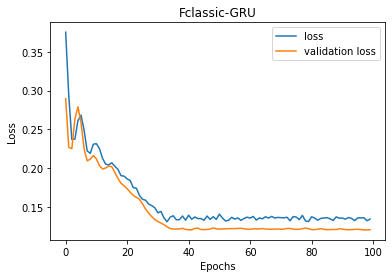

In [64]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Fclassic-GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('Fclassic-GRU.png', dpi=100)

In [ ]:
from google.colab import files
files.download('Fclassic-GRU.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 1s 10ms/step


In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        65
           1       0.76      1.00      0.86        35

    accuracy                           0.89       100
   macro avg       0.88      0.92      0.89       100
weighted avg       0.92      0.89      0.89       100



In [ ]:
print(confusion_matrix(y_test,predictions))

[[50 15]
 [ 0 35]]


In [ ]:
cnf_matrix = [[50, 15],[0, 35]]

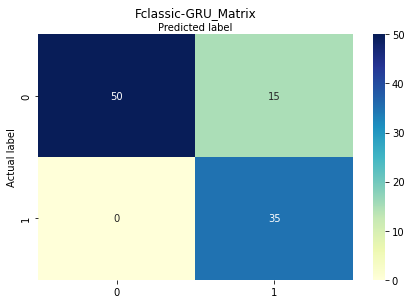

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Fclassic-GRU_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Fclassic-GRU_Matrix.png')
plt.show()

In [ ]:
from google.colab import files
files.download('Fclassic-GRU_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 